In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/concrete.csv


cement = pd.read.csv('/kaggle/input/cement-manufacturing-concrete-dataset/concrete.csv')

In [2]:
cement = pd.read_csv('/kaggle/input/concrete.csv')

In [3]:
type(cement)

pandas.core.frame.DataFrame

In [4]:
cement.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
def label_strength(i):
    if i < 20: 
        i =1
    elif 20 <= i < 30: 
        i=2
    elif 30 <= i < 40: 
        i=3
    elif 40 <= i < 50: 
        i=4
    else: 
        i=5
    return i

In [6]:
cement['label']=cement['strength'].apply(label_strength)

data_dict = cement.groupby('label')


cement.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,2
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,2
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,2
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,4
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1


In [7]:
cement.to_csv('convert_concrete.csv')

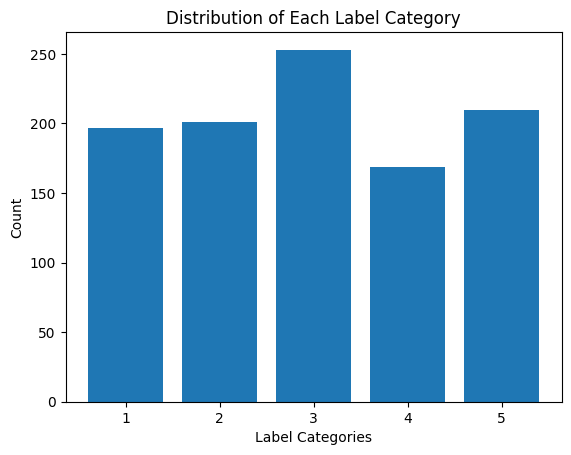

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(cement['label'].value_counts().index, cement['label'].value_counts().values)

# Add labels and title
ax.set_xlabel('Label Categories')  # x-axis label
ax.set_ylabel('Count')         # y-axis label
ax.set_title('Distribution of Each Label Category')  # plot title

# Display the plot
plt.show()

In [9]:
unique_age = cement['age'].unique()
unique_age.sort()
age_dict={age:i+1 for i, age in enumerate(unique_age)}
cement['age']=cement['age'].map(age_dict)
cement.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,5,29.89,2
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,4,23.51,2
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,5,29.22,2
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5,45.85,4
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,5,18.29,1


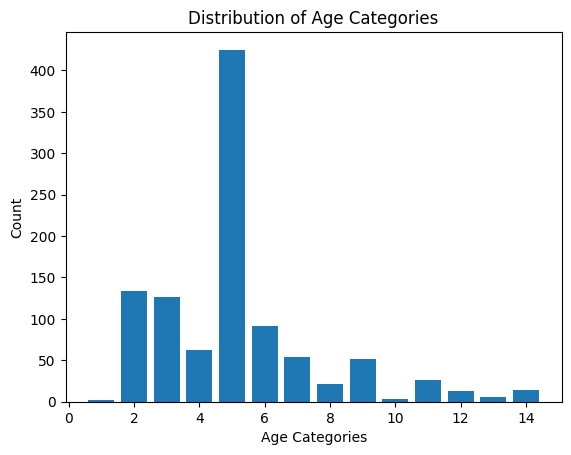

In [10]:
fig, ax = plt.subplots()
ax.bar(cement['age'].value_counts().index, cement['age'].value_counts().values)

ax.set_xlabel('Age Categories')  # x-axis label for age categories
ax.set_ylabel('Count')       # y-axis label for frequency of each category
ax.set_title('Distribution of Age Categories')  # plot title

# Display the plot
plt.show()

In [11]:
cement.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,5.179612,35.817961,2.994175
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,2.469202,16.705742,1.393434
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,3.000000,23.710000,2.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,5.000000,34.445000,3.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,6.000000,46.135000,4.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,14.000000,82.600000,5.000000


In [12]:
#normalize using minmaxscale 

cement_min_max_scale = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg']
cement[cement_min_max_scale] = cement[cement_min_max_scale].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [13]:
cement.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,5,29.89,2
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,4,23.51,2
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,5,29.22,2
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,5,45.85,4
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,5,18.29,1


In [14]:
normalized_concrete = cement.copy()
normalized_concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,5,29.89,2
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,4,23.51,2
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,5,29.22,2
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,5,45.85,4
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,5,18.29,1


In [15]:
normalized_concrete.to_csv('normalized_concrete.csv')

In [16]:
# Composite features 
cement['cement_slag'] = cement['cement'].cov(cement['slag'])
cement['cement_ash'] = cement['cement'].cov(cement['ash'])
cement['water_fineagg'] = cement['water'].cov(cement['fineagg'])
cement['ash_superplastic'] = cement['ash'].cov(cement['superplastic'])
composite_features = cement.copy()
composite_features.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label,cement_slag,cement_ash,water_fineagg,ash_superplastic
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,5,29.89,2,-0.015764,-0.030331,-0.015461,0.022399
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,4,23.51,2,-0.015764,-0.030331,-0.015461,0.022399
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,5,29.22,2,-0.015764,-0.030331,-0.015461,0.022399
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,5,45.85,4,-0.015764,-0.030331,-0.015461,0.022399
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,5,18.29,1,-0.015764,-0.030331,-0.015461,0.022399


In [17]:
composite_features.to_csv('features_concrete.csv')

In [18]:
corr_dict = ['cement', 'water', 'superplastic', 'age']
corr = cement[corr_dict].corrwith(cement['strength'])
print(corr)

cement          0.497832
water          -0.289633
superplastic    0.366079
age             0.474690
dtype: float64


In [19]:
corr_dict = ['cement', 'water', 'superplastic', 'age', 'cement_slag', 'cement_ash', 'water_fineagg', 'ash_superplastic', 'strength', 'label']
select_feature_concrete = cement[corr_dict]
select_feature_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   water             1030 non-null   float64
 2   superplastic      1030 non-null   float64
 3   age               1030 non-null   int64  
 4   cement_slag       1030 non-null   float64
 5   cement_ash        1030 non-null   float64
 6   water_fineagg     1030 non-null   float64
 7   ash_superplastic  1030 non-null   float64
 8   strength          1030 non-null   float64
 9   label             1030 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 80.6 KB


In [20]:
select_feature_concrete.head()

,cement,water,superplastic,age,cement_slag,cement_ash,water_fineagg,ash_superplastic,strength,label
0,0.089726,0.652556,0.000000,5,-0.015764,-0.030331,-0.015461,0.022399,29.89,2
1,0.152740,0.291534,0.335404,4,-0.015764,-0.030331,-0.015461,0.022399,23.51,2
2,0.337900,0.523962,0.170807,5,-0.015764,-0.030331,-0.015461,0.022399,29.22,2
3,0.374429,0.848243,0.000000,5,-0.015764,-0.030331,-0.015461,0.022399,45.85,4
4,0.120548,0.571086,0.282609,5,-0.015764,-0.030331,-0.015461,0.022399,18.29,1


In [21]:
select_feature_concrete.to_csv('selected_feature_concrete.csv')

In [22]:
cemented = pd.read_csv('convert_concrete.csv') 

cemented.head()

,Unnamed: 0,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
0,0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,2
1,1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,2
2,2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,2
3,3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,4
4,4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1


In [23]:
cemented.to_csv('selected_converted_concrete.csv')

In [24]:
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
 
concrete = pd.read_csv("/kaggle/working/features_concrete.csv") 

feature_cols = ['cement', 'water', 'superplastic', 'age'] 
x = concrete[feature_cols] # Feature
y = concrete['label']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)  
 
clf = DecisionTreeClassifier()  

clf = clf.fit(x_train, y_train)  

y_pred = clf.predict(x_test)  

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6213592233009708


In [25]:
# Train Model Decision Tree with all features with normalisation and without composite features
concrete1 = pd.read_csv("/kaggle/working/normalized_concrete.csv") 

x1 = concrete1[feature_cols] # Feature
y1 = concrete1['label'] 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state = 1)  
 
clf = DecisionTreeClassifier()  

clf = clf.fit(x1_train, y1_train)  

y1_pred = clf.predict(x1_test)  

print("Accuracy: ", metrics.accuracy_score(y1_test, y1_pred))

Accuracy:  0.6245954692556634


In [26]:
# selected features with normalisation
concrete2 = pd.read_csv("/kaggle/working/features_concrete.csv") 

x2 = concrete2[feature_cols] # Feature
y2 = concrete2['label'] 
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state = 1)  
 
clf = DecisionTreeClassifier()  

clf = clf.fit(x2_train, y2_train)  

y2_pred = clf.predict(x2_test)  

print("Accuracy: ", metrics.accuracy_score(y2_test, y2_pred))

Accuracy:  0.6343042071197411


In [27]:
# selected features with normalisation
concrete3 = pd.read_csv("/kaggle/working/selected_feature_concrete.csv") 

x3 = concrete3[feature_cols] # Feature
y3 = concrete3['label'] 
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state = 1)  
 
clf = DecisionTreeClassifier()  

clf = clf.fit(x3_train, y3_train)  

y3_pred = clf.predict(x3_test)  

print("Accuracy: ", metrics.accuracy_score(y3_test, y3_pred))

Accuracy:  0.627831715210356


In [28]:
# selected feature without normalisation
concrete4 = pd.read_csv("/kaggle/working/selected_converted_concrete.csv") 

x4 = concrete4[feature_cols] # Feature
y4 = concrete4['label'] 
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state = 1)  
 
clf = DecisionTreeClassifier()  

clf = clf.fit(x4_train, y4_train)  

y4_pred = clf.predict(x4_test)  

print("Accuracy: ", metrics.accuracy_score(y4_test, y4_pred))

Accuracy:  0.6343042071197411
